# **ERIK SANTANA MONTELONGO**

# **IMPORTS Y LIBRERIAS**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Importación de los datos
url = "https://raw.githubusercontent.com/Erikzonnn/SNS_ACT4_1/refs/heads/main/bank-full.csv"
df = pd.read_csv(url, sep=';')
df_original = df.copy()
print("Shape:", df.shape)
df.head()

Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# **PREPROCESAMIENTO DE DATOS**

In [6]:
# Eliminar columna objetivo
df = df.drop('y', axis=1)

# Convertir variables categóricas a dummies
df_encoded = pd.get_dummies(df, drop_first=True)

# Normalizar datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)


# **ELBOW Y SILHOUETTE (KMeans)**

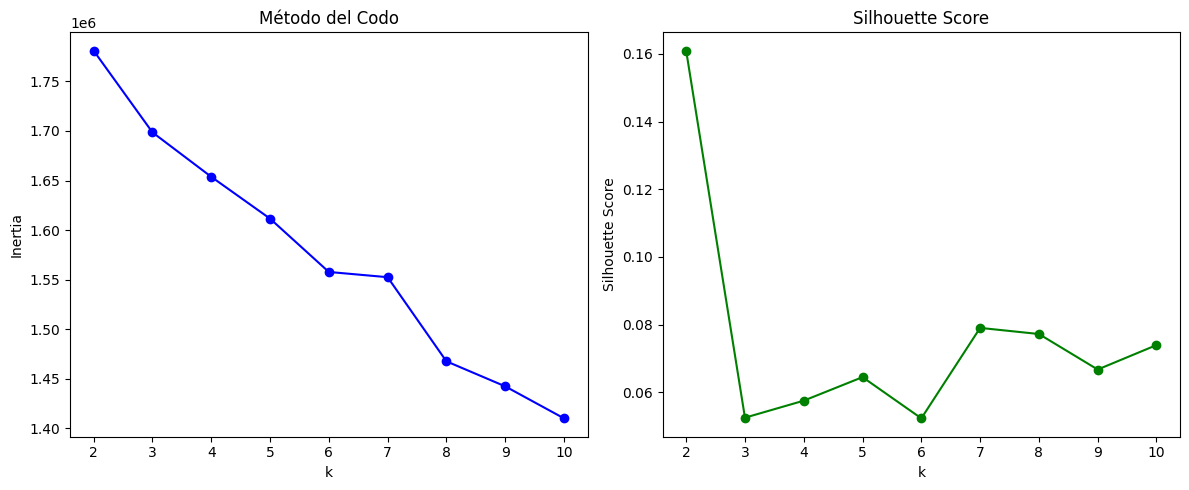

In [7]:
inertia = []
silhouette = []

K = range(2, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df_scaled, model.labels_))

# Graficos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Método del Codo')

plt.subplot(1,2,2)
plt.plot(K, silhouette, 'go-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

# **CLUSTERING**

In [8]:
# Elige el k optimo
k_optimo = 4
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df_encoded['Cluster'] = clusters


# **REDUCCION CON PCA**

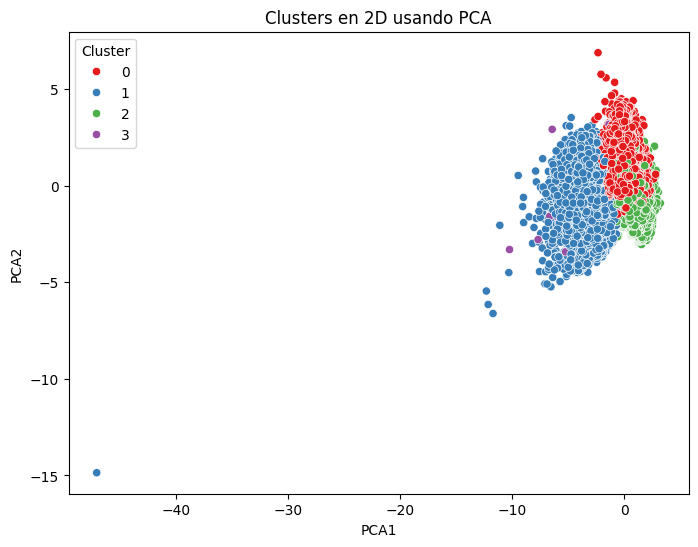

In [9]:
# Reduccion de dimensionalidad para visualizacion
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_encoded['PCA1'] = df_pca[:,0]
df_encoded['PCA2'] = df_pca[:,1]

# Visualizacion de clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_encoded, palette='Set1')
plt.title('Clusters en 2D usando PCA')
plt.show()


# **PERFILADO DE CLUSTERS**

In [10]:
df_original['Cluster'] = clusters
summary = df_original.groupby('Cluster').agg({
    'age': 'mean',
    'balance': 'mean',
    'duration': 'mean',
    'campaign': 'mean',
    'job': lambda x: x.mode()[0],
    'education': lambda x: x.mode()[0],
    'marital': lambda x: x.mode()[0]
})
summary


,age,balance,duration,campaign,job,education,marital
Cluster,,,,,,,
0,41.766595,1459.415097,257.843757,3.098107,management,secondary,married
1,40.911852,1533.126581,259.093851,2.053186,management,secondary,married
2,39.823105,1137.634321,257.162579,2.694074,blue-collar,secondary,married
3,44.457944,2315.672897,329.327103,2.196262,management,secondary,married


In [11]:
# Exportar a Excel
df_original.to_excel("clientes_segmentados.xlsx", index=False)
print("Archivo exportado")


Archivo exportado
